# CREATE 'DATA SNAPSHOT' TO SEE DATA COMPOSITION

1. SOLD PRICE/LIST PRICE HISTOGRAM
2. PAIRPLOT
3. CORRELATION MATRIX


## TARGET FEATURE:
 - SOLD/LISTED PRICE RATIO CLASSIFIED (CATEGORICAL, 'sold_list_ratio_classified')
## POTENTIAL INPUT FEATURES:
### NOMINAL:
 - SOLD/LISTED PRICE RATIO CLASSIFIED ('sold_list_ratio_classified')
 - LIST PRICE ('list_price')
 - PRICE PER SQUARE FOOT ('pricepersqft')
 - PRICE PER LOT SQUARE FOOT ('priceperlotsqft')
 - BEDS ('beds')
 - FULL BATHS ('full_baths')
 - HALF BATHS ('half_baths')
 - TOTAL BATHS ('total_baths')
 - STORIES ('stories')
 - YEAR BUILT ('year_built')
 - BED/SOLD PRICE RATIO ('bedcostratio')
 - BATH/SOLD PRICE RATIO ('bathcostratio')
 - BATH+BED/SOLD PRICE RATI0 ('bathbedcostratio')
 - DAYS ON MARKET ('days_on_market')
 - AMENITIES(BED, BATH, GARAGE)/SOLD PRICE RATIO ('amenitiescostratio')
 - RELATIVE PRICE PER SQUARE FOOT ('relative_price_per_sqft')
### CATEGORICAL:
 - HAS HOA ('hashoa')
 - SEASON LISTED ('season_listed_encoded')
 - NEIGHBORHOOD ('neighborhood')
 - ZIP CODE ('zip_code')
 - LIST PRICE QUARTILE ('list_price_quartile')
 - DAYS ON MARKET QUARTILE ('days_on_market_quartile')
 

In [1]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    minmax_scale,
)
from numpy import ravel
import statsmodels.api as sm
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier


/Users/nikkosiegfried/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/nikkosiegfried/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# LOAD DATA
pd.set_option('display.max_columns', 500)
df = pd.read_csv("../data/Los_Angeles_Sold_CLEANED.csv")


In [3]:
df

property_url   mls      mls_id  \
0     https://www.realtor.com/realestateandhomes-det...  WECA   24-396131   
1     https://www.realtor.com/realestateandhomes-det...  MRCA  BB24116300   
2     https://www.realtor.com/realestateandhomes-det...  MRCA  SR24103064   
3     https://www.realtor.com/realestateandhomes-det...  MRCA  GD24148443   
4     https://www.realtor.com/realestateandhomes-det...  WECA   24-433325   
...                                                 ...   ...         ...   
6065  https://www.realtor.com/realestateandhomes-det...  MRCA  PW23194058   
6066  https://www.realtor.com/realestateandhomes-det...  MRCA  SR23169567   
6067  https://www.realtor.com/realestateandhomes-det...  MRCA  SR23214196   
6068  https://www.realtor.com/realestateandhomes-det...  MRCA  SR24022314   
6069  https://www.realtor.com/realestateandhomes-det...  MRCA  SB23177065   

     status                                               text          style  \
0      SOLD  Welcome to 2445 Nalin Drive, a serene retreat ...  SINGLE_FAMILY   
1      SOLD  Your new home is here! This fully renovated Me...  SINGLE_FAMILY   
2      SOLD  Accepting Back Up offers- Charming Del Rey 2 b...  SINGLE_FAMILY   
3      SOLD  This property is a fixer. The house consists o...  SINGLE_FAMILY   
4      SOLD  Sold off market. Property is posted for Compar...  SINGLE_FAMILY   
...     ...                                                ...            ...   
6065   SOLD  Welcome home to your tranquil sanctuary nestle...  SINGLE_FAMILY   
6066   SOLD  Modern Elegance Meets California Comfort in Ch...  SINGLE_FAMILY   
6067   SOLD  HUGE PRICE REDUCTION!!! Welcome to the epitome...  SINGLE_FAMILY   
6068   SOLD  Come enjoy luxury living in this refreshed and...  SINGLE_FAMILY   
6069   SOLD  Welcome Home to your Personal Oasis!!! This ra...  SINGLE_FAMILY   

          full_street_line                street unit            city state  \
0            2445 Nalin Dr         2445 Nalin Dr  NaN     Los Angeles    CA   
1         20368 Via Medici      20368 Via Medici  NaN    Porter Ranch    CA   
2          4320 Kenyon Ave       4320 Kenyon Ave  NaN     Los Angeles    CA   
3          19350 Lanark St       19350 Lanark St  NaN          Reseda    CA   
4            S Saltair Ave         S Saltair Ave  NaN     Los Angeles    CA   
...                    ...                   ...  ...             ...   ...   
6065        4719 Morse Ave        4719 Morse Ave  NaN    Sherman Oaks    CA   
6066       11038 Arroyo Ct       11038 Arroyo Ct  NaN      Chatsworth    CA   
6067      20716 Walnut Cir      20716 Walnut Cir  NaN    Porter Ranch    CA   
6068       19705 Hamlin St       19705 Hamlin St  NaN  Woodland Hills    CA   
6069  2844 S Kerckhoff Ave  2844 S Kerckhoff Ave  NaN       San Pedro    CA   

      zip_code  beds  full_baths  half_baths    sqft  year_built  days_on_mls  \
0        90077   3.0         1.0         1.0  2307.0      1965.0         93.0   
1        91326   5.0         4.0         1.0  4116.0      2001.0         69.0   
2        90066   3.0         3.0         0.0  1813.0      1948.0         97.0   
3        91335   3.0         2.0         0.0  1296.0      1954.0         37.0   
4        90049   3.0         4.0         0.0  2833.0      1928.0          0.0   
...        ...   ...         ...         ...     ...         ...          ...   
6065     91423   3.0         3.0         0.0  1704.0      1958.0        130.0   
6066     91311   4.0         4.0         2.0  6181.0      2020.0        170.0   
6067     91326   4.0         3.0         0.0  2664.0      2021.0         99.0   
6068     91367   4.0         2.0         0.0  1392.0      1954.0         28.0   
6069     90731   1.0         1.0         0.0   602.0      1923.0        159.0   

      list_price   list_date  sold_price last_sold_date  assessed_value  \
0        1899000  2024-05-28     2306600     2024-08-29        490972.0   
1        2399000  2024-06-21     2350000     2024-08-29       1051086.0  

In [4]:
df.describe()

zip_code         beds   full_baths   half_baths          sqft  \
count   6070.000000  6070.000000  6070.000000  6070.000000   6070.000000   
mean   90710.301647     3.438880     2.329984     0.242010   2096.991269   
std      645.326001     1.035761     1.258358     0.473988   1291.326276   
min    90001.000000     1.000000     1.000000     0.000000    420.000000   
25%    90045.000000     3.000000     1.000000     0.000000   1332.250000   
50%    90731.000000     3.000000     2.000000     0.000000   1759.000000   
75%    91344.000000     4.000000     3.000000     0.000000   2439.500000   
max    91607.000000    12.000000    11.000000     4.000000  15100.000000   

        year_built  days_on_mls    list_price    sold_price  assessed_value  \
count  6070.000000  5488.000000  6.070000e+03  6.070000e+03    5.998000e+03   
mean   1955.223064    64.337828  1.664102e+06  1.651338e+06    7.692791e+05   
std      27.958912    50.814398  1.755127e+06  1.540678e+06    1.167266e+06   
min    1888.000000     0.000000  2.300000e+05  2.300000e+05    9.110000e+02   
25%    1938.000000    36.000000  8.491250e+05  8.625000e+05    1.882710e+05   
50%    1953.000000    49.000000  1.199000e+06  1.217750e+06    4.672445e+05   
75%    1964.000000    76.000000  1.875000e+06  1.860000e+06    8.862858e+05   
max    2024.000000   766.000000  3.990000e+07  2.537500e+07    2.425092e+07   

       estimated_value      lot_sqft  price_per_sqft     latitude  \
count     5.972000e+03  6.070000e+03     6070.000000  6070.000000   
mean      1.657056e+06  7.898803e+04      774.966227    34.111999   
std       1.507601e+06  3.842833e+06      299.748247     0.121179   
min       2.335000e+05  8.330000e+02      230.000000    33.706686   
25%       8.691500e+05  5.590000e+03      562.000000    34.033390   
50%       1.218400e+06  6.881500e+03      700.000000    34.126463   
75%       1.881346e+06  9.008000e+03      923.000000    34.202725   
max       2.691430e+07  2.607937e+08     3282.000000    34.391453   

         longitude  fips_code      stories      hoa_fee  parking_garage  \
count  6070.000000     6070.0  6070.000000  6070.000000     6070.000000   
mean   -118.410652     6037.0     1.345305    20.069852        1.541516   
std       0.122070        0.0     0.566873   120.627437        1.205048   
min    -118.667519     6037.0     1.000000     0.000000        0.000000   
25%    -118.501268     6037.0     1.000000     0.000000        1.000000   
50%    -118.414207     6037.0     1.000000     0.000000        2.000000   
75%    -118.312889     6037.0     2.000000     0.000000        2.000000   
max    -118.129238     6037.0     4.000000  4169.000000       42.000000   

       days_on_market  bedcostratio  bathcostratio  bathbedcostratio  \
count     6070.000000  6.070000e+03   6.070000e+03      6.070000e+03   
mean        67.835914  2.775272e-06   1.858411e-06      4.633683e-06   
std         51.458482  1.314248e-06   8.424809e-07      1.978762e-06   
min          0.000000  2.439024e-07   1.951220e-07      4.390244e-07   
25%         37.000000  1.729387e-06   1.234568e-06      3.103448e-06   
50%         52.000000  2.631579e-06   1.714286e-06      4.437326e-06   
75%         84.000000  3.597122e-06   2.352941e-06      5.855294e-06   
max        766.000000  1.052632e-05   6.172840e-06      1.473684e-05   

       amenitiescostratio  pricepersqft  priceperlotsqft  total_baths  \
count        6.070000e+03   6070.000000      6070.000000  6070.000000   
mean         5.887260e-06    774.964988       222.369253     2.571993   
std          2.570620e-06    299.750104       169.670650     1.445332   
min          5.853659e-07    229.808714         0.002320     1.000000   
25%          3.809524e-06    561.976591       119.136182     2.000000   
50%          5.680026e-06    700.056689       164.701300     2.000000   
75%          7.692308e-06    923.240822       271.506950     3.000000   
max          2.173913e-05   3281.575156      2109.067939    14.000000   

       re

Text(0.5, 1.0, 'Ratio Between Sold Price and List Price')

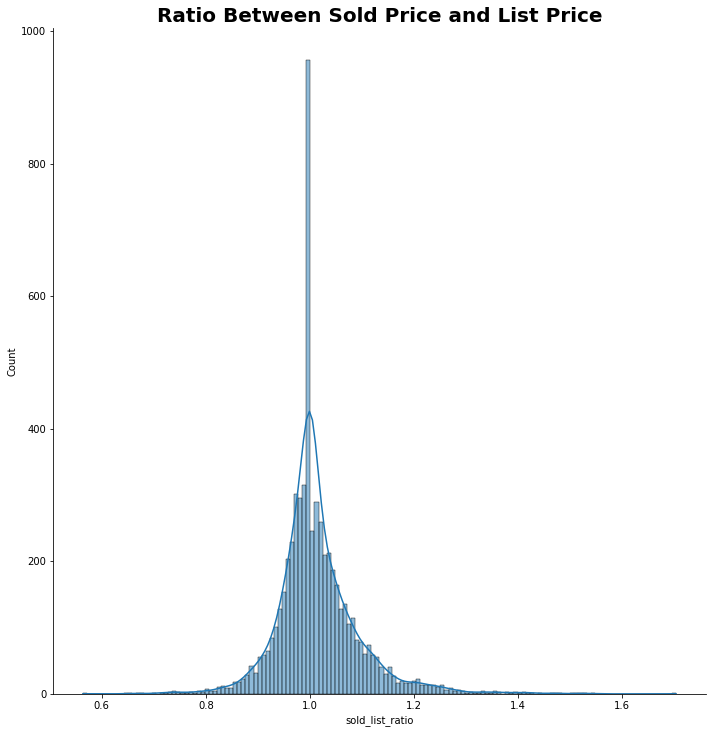

In [4]:
# 1. SOLD PRICE/LIST PRICE HISTOGRAM
sns.displot(df['sold_list_ratio'], kde=True,height=10)
plt.title("Ratio Between Sold Price and List Price",size=20, weight='bold')
# Notes: Fairly Even normal distrubion with high amount of homes that have equal sold and listed price

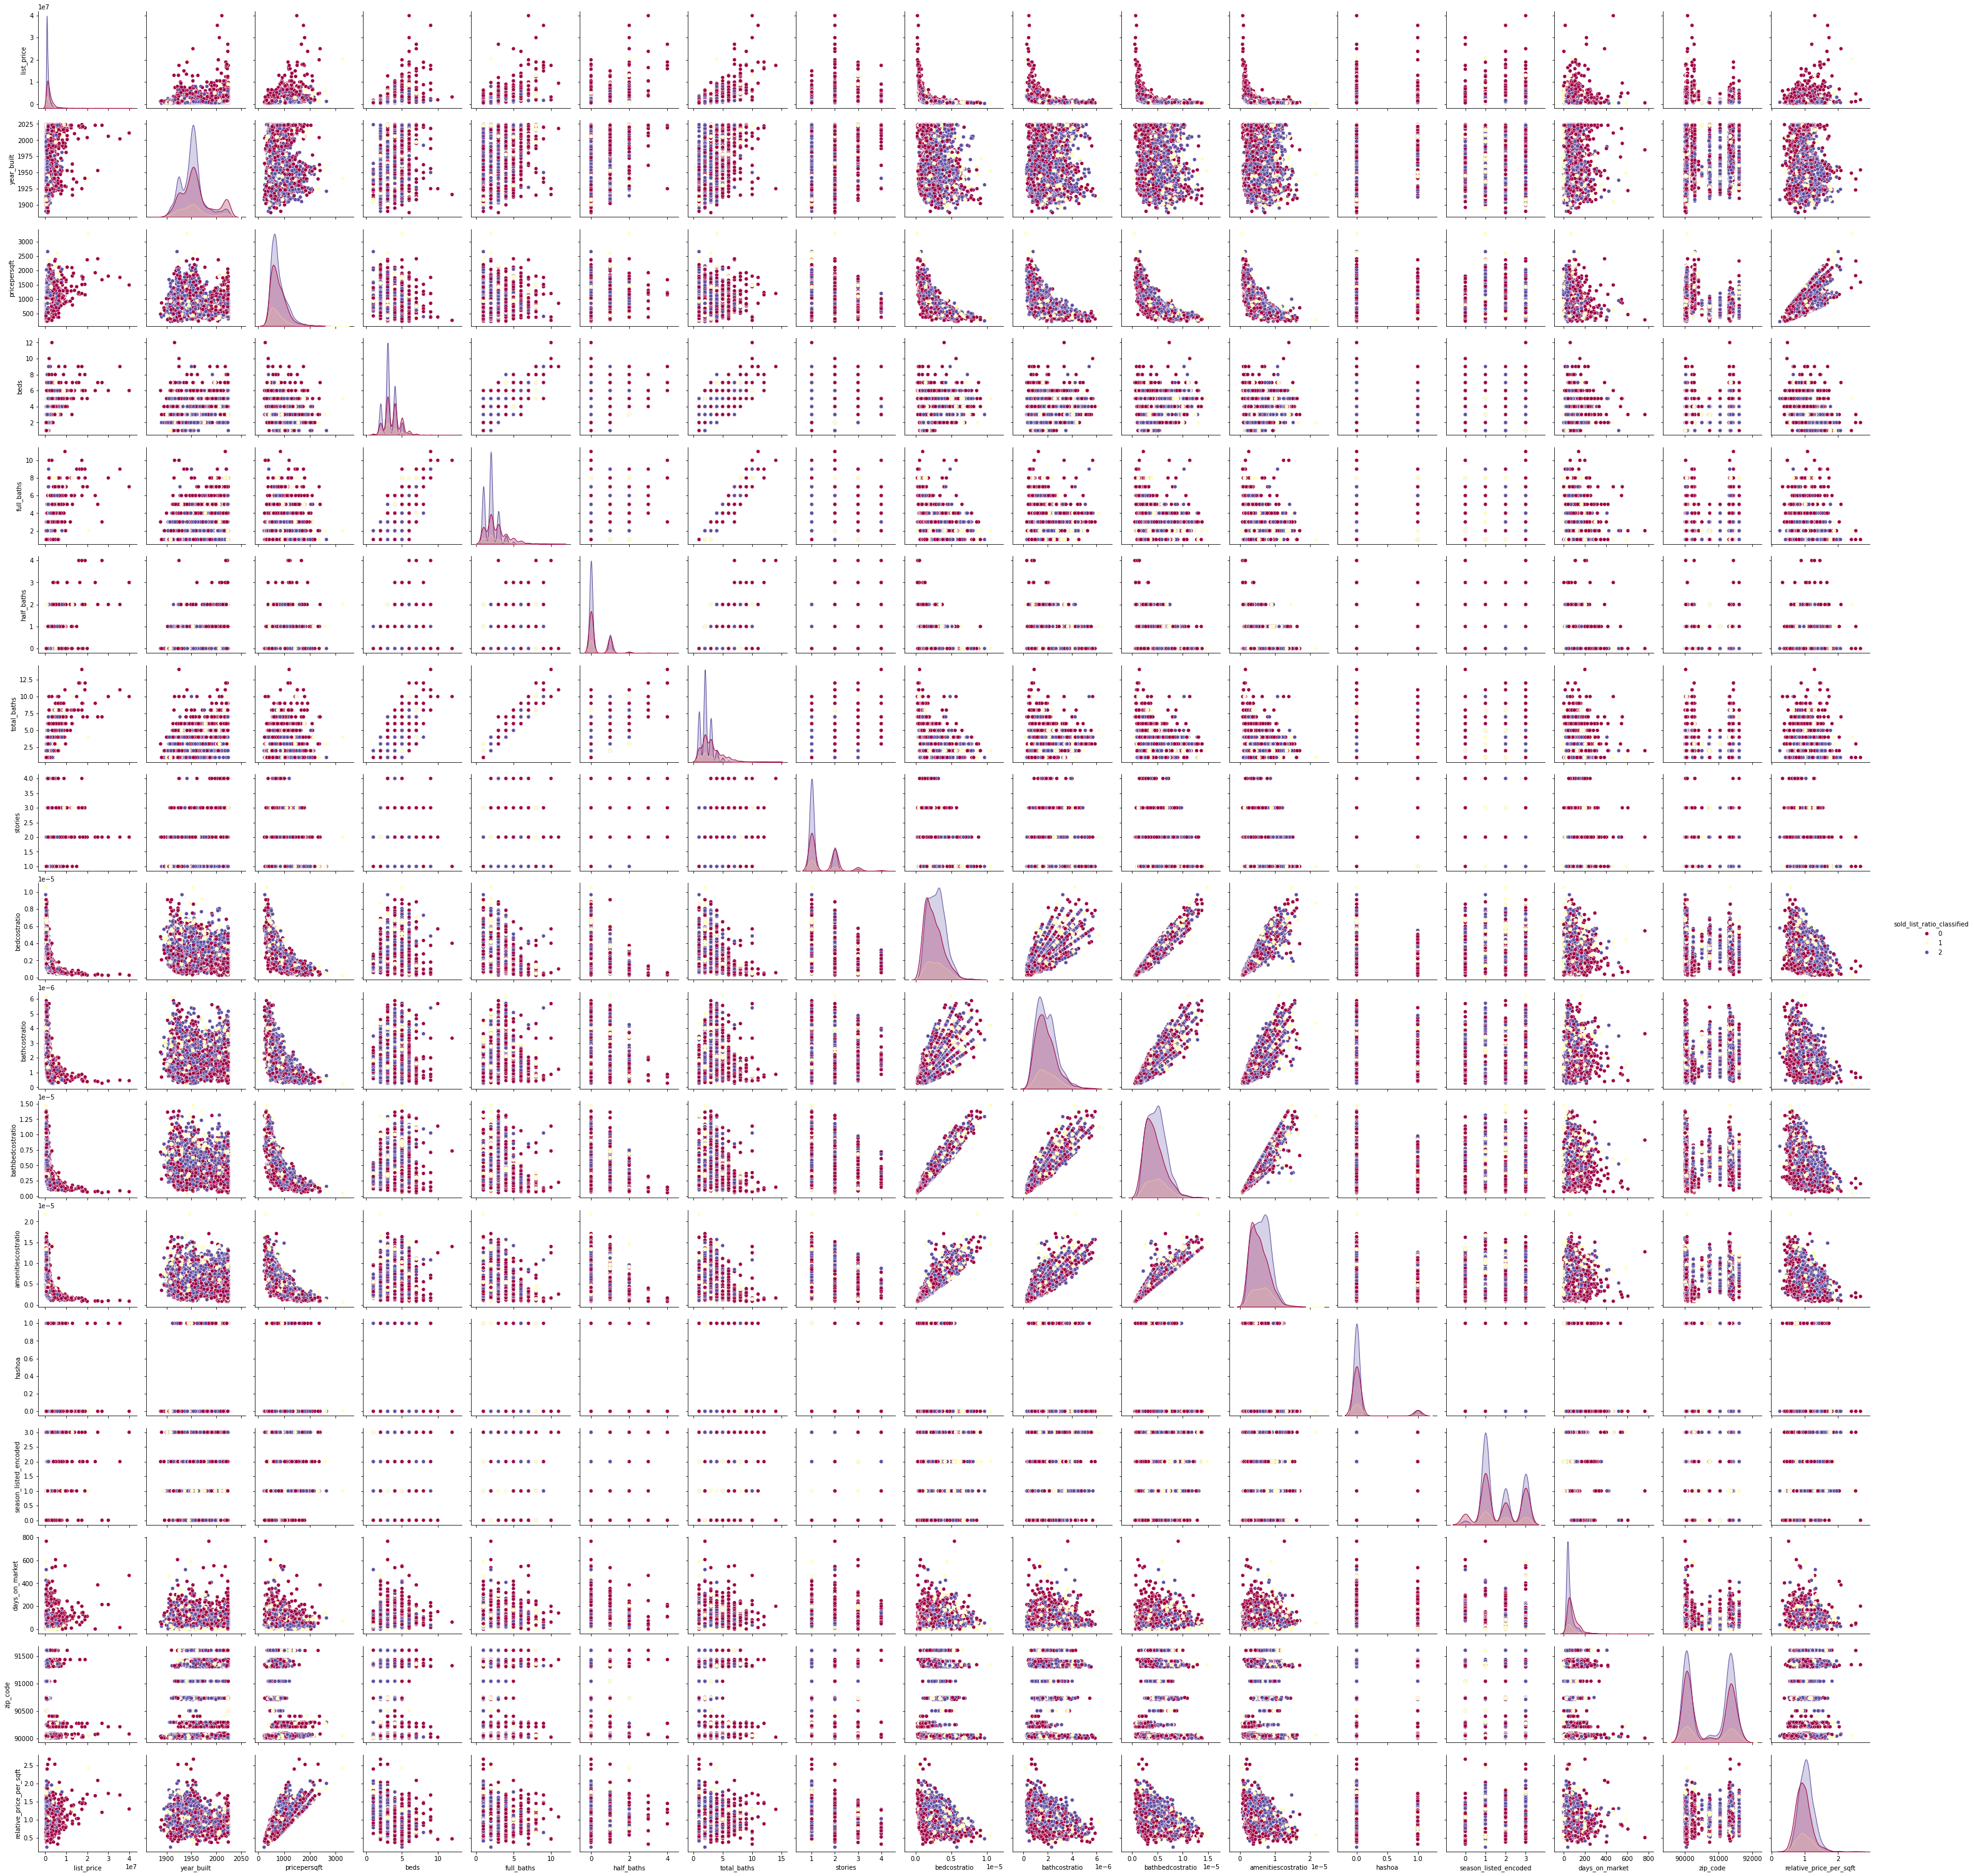

In [5]:
# 2. PAIRPLOT
features = ['list_price','list_price_quartile','year_built','pricepersqft','beds','full_baths', 'half_baths','total_baths','stories','bedcostratio', 'bathcostratio', 'bathbedcostratio','amenitiescostratio','hashoa',"season_listed_encoded",'days_on_market','days_on_market_quartile','zip_code','sold_list_ratio_classified', 'relative_price_per_sqft']
sns.pairplot(df[features], hue="sold_list_ratio_classified", palette="Spectral")


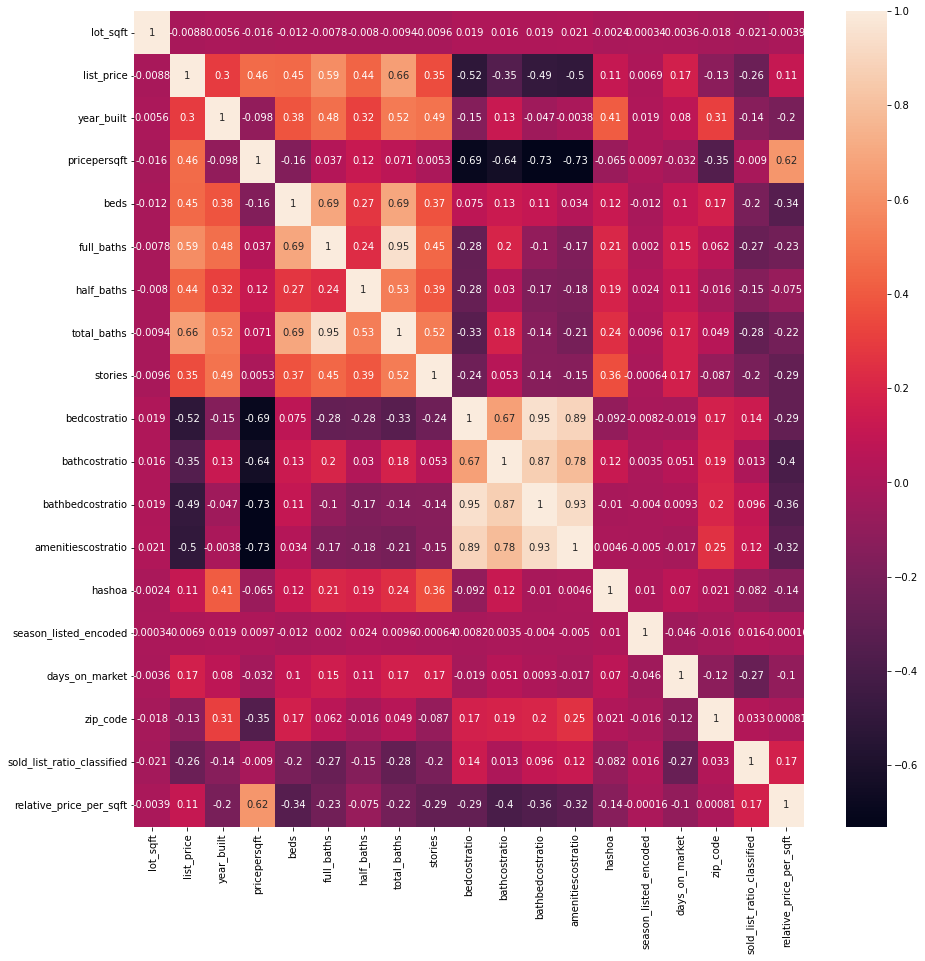

In [6]:
#3. CORRELATION MATRIX
plt.figure(figsize=(15,15))

features = ['lot_sqft','list_price','year_built','pricepersqft','beds','full_baths', 'half_baths','total_baths','stories','bedcostratio', 'bathcostratio', 'bathbedcostratio','amenitiescostratio','hashoa',"season_listed_encoded",'days_on_market','zip_code','sold_list_ratio_classified','relative_price_per_sqft']
corr=df[features].corr(method='pearson')
ax = sns.heatmap(corr,annot=True)
#Notes: 
# - bed/cost ratio, bath/cost ratio bath and bed/cost ratio, and amenities/cost ratio are all highlt collinear 
#      and one will likely need to be selected 

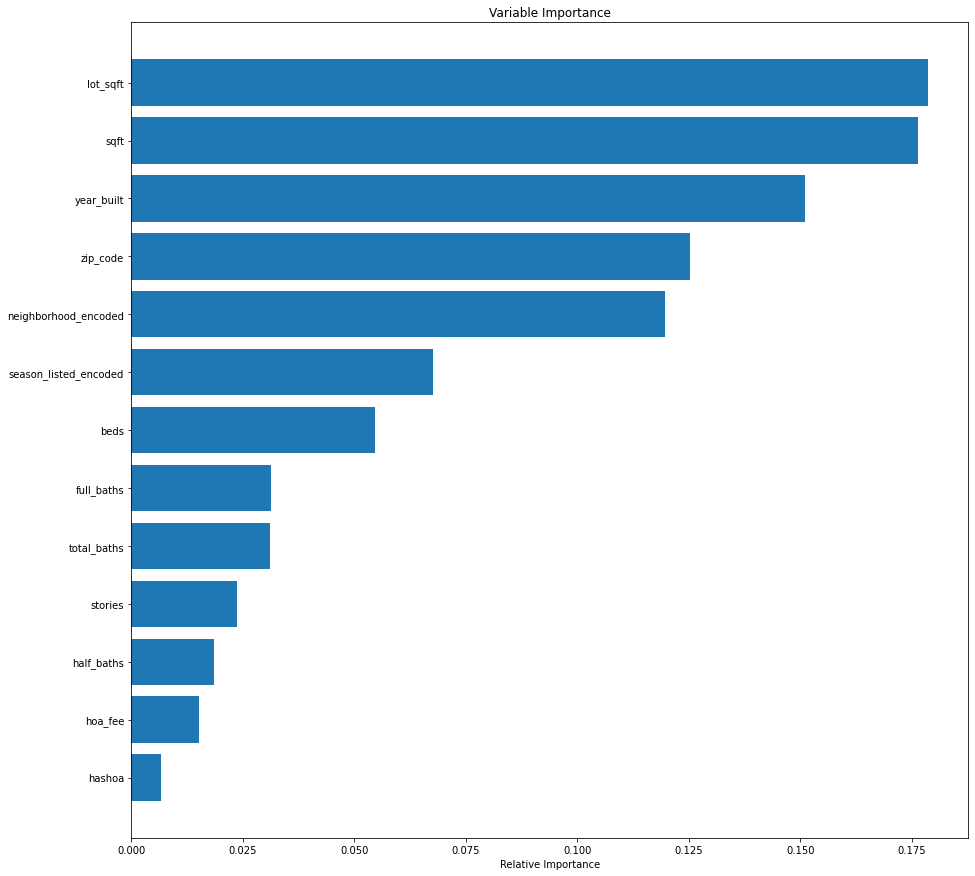

In [7]:
#4. Random Forest Classifier Importance Classifier: Do same for 
features = np.array([
            'sqft',
            'lot_sqft',
            'year_built',
            'beds',
            'full_baths', 
            'half_baths',
            'total_baths',
            'stories',
            'hashoa',
            "season_listed_encoded",
            'zip_code',
            'neighborhood_encoded',
            'hoa_fee'])
clf = RandomForestClassifier()
clf.fit(df[features], df['sold_price'])

# from the calculated importances, order them from most to least important
# and make a barplot so we can visualize what is/isn't important
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)


padding = np.arange(len(features)) + 0.5
plt.figure(figsize=(15,15))
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

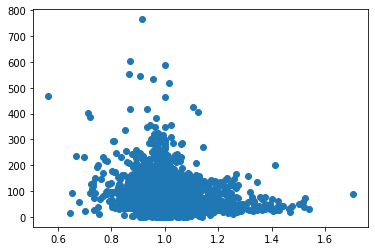

In [12]:
x = df.sold_list_ratio
y = df.days_on_market
plt.scatter(x, y)


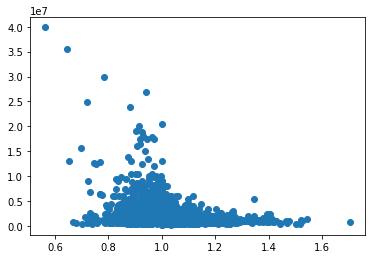

In [13]:
x = df.sold_list_ratio
y = df.list_price
plt.scatter(x, y)